In [3]:
library('igraph')
library('Matrix')
library('pracma')

Facebook Network
==

---
1.1 Structural properties of the facebook network
---

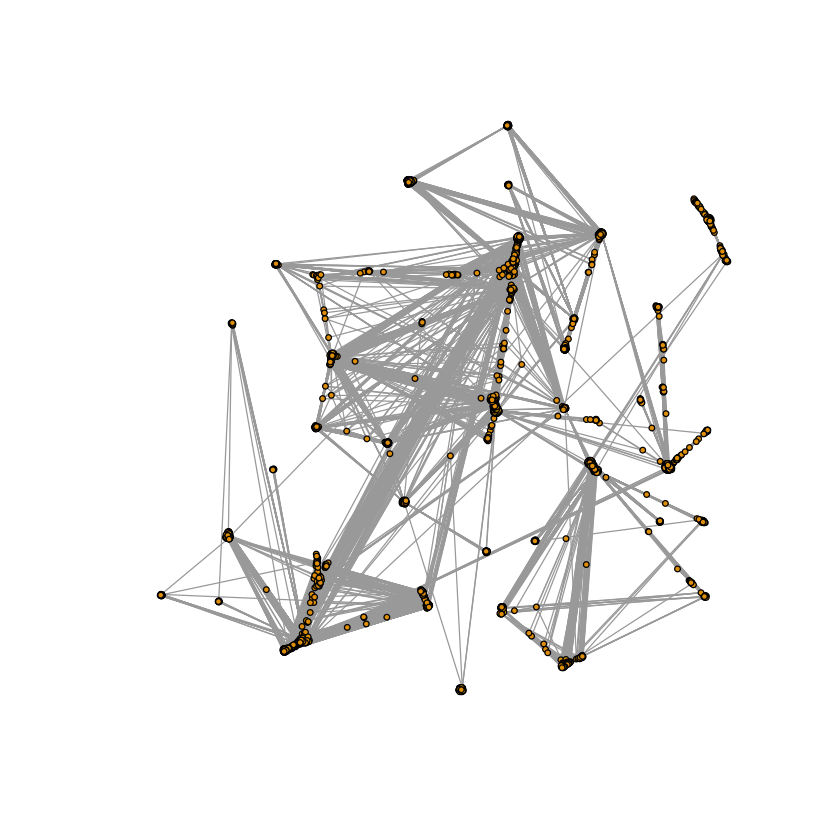

In [4]:
g=read_graph("./facebook_combined.txt",format=c("edgelist"), directed=FALSE)
plot(g,vertex.size=2,vertex.label=NA)

- Question 1: Is the facebook network connected? If not, find the giant
connected component (GCC) of the network and report the size of the
GCC.

In [5]:
is_connected(g)

[1] TRUE

- Question 2: Find the diameter of the network. If the network is not
connected, then find the diameter of the GCC.

In [6]:
Diameter=diameter(g)
cat("The diameter of the Facebook network = ",Diameter)

The diameter of the Facebook network =  8

- Question 3: Plot the degree distribution of the facebook network and
report the average degree.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“819 y values <= 0 omitted from logarithmic plot”

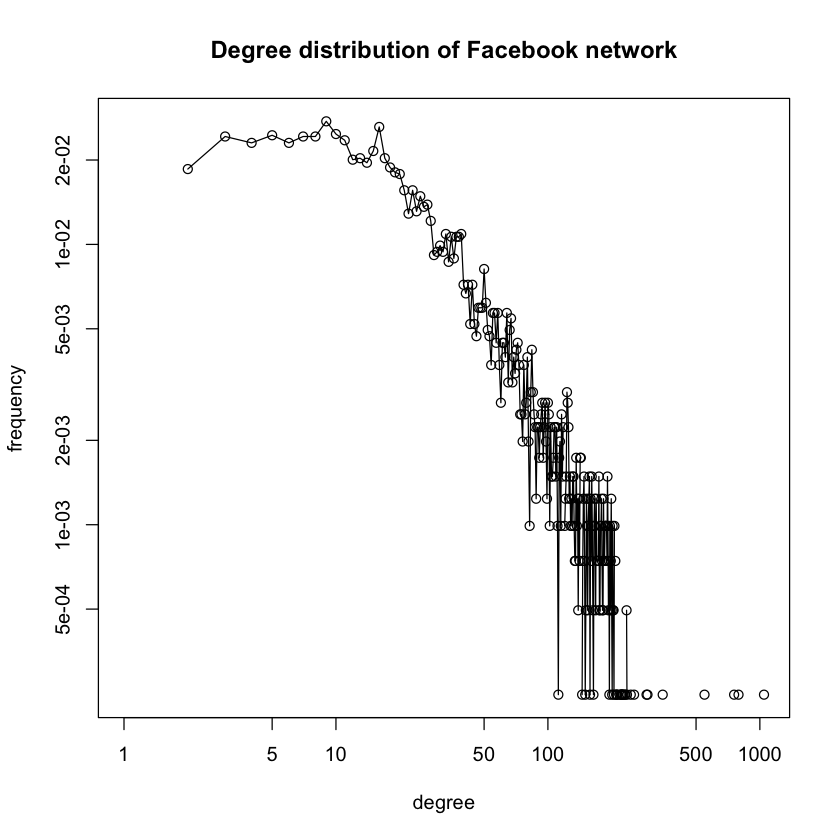

In [7]:
deg=degree.distribution(g)
plot(deg,log='xy', type='o', lwd  = 1,
     xlab = "degree",ylab = "frequency",main="Degree distribution of Facebook network")

In [12]:
EX=0;
for (i in 1:length(deg)){
    EX=EX+(i-1)*deg[i]
}
cat("The average degree of the Facebook network = ",EX)

The average degree of the Facebook network =  43.69101

- Question 4: Plot the degree distribution of question 3 in a log-log scale.
Try to fit a line to the plot and estimate the slope of the line.


Call:
lm(formula = deglog[20:length(deglog) - 6] ~ xlog[20:length(xlog) - 
    6])

Coefficients:
              (Intercept)  xlog[20:length(xlog) - 6]  
                    1.032                     -1.607  


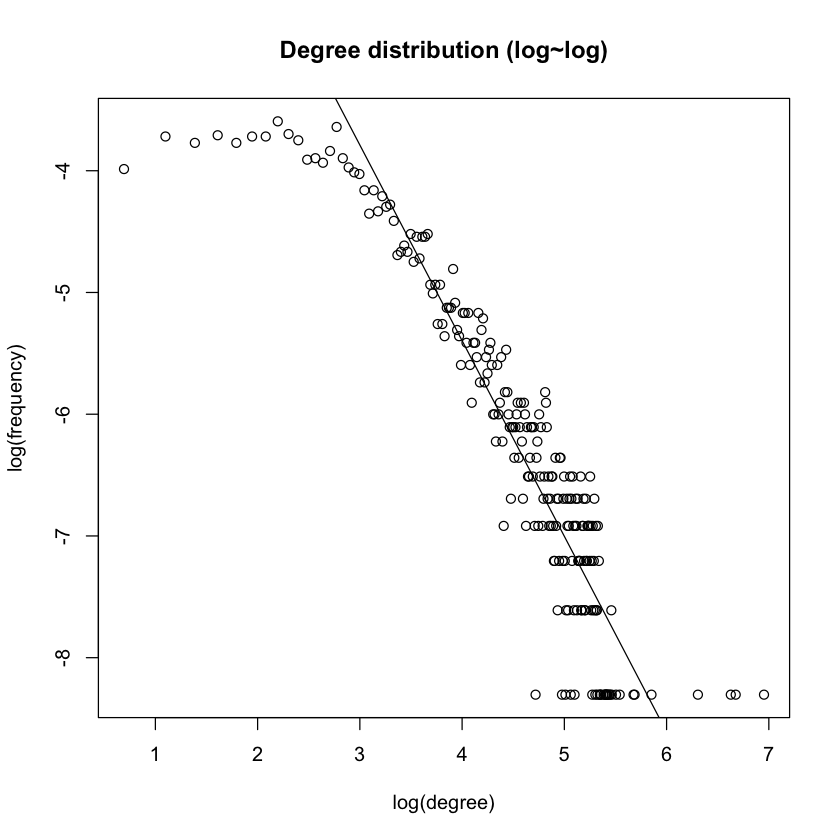

In [13]:
deglog=log(deg)
remove=is.infinite(deglog)
deglog=log(deg[!remove])
xlog=1:length(deg)
xlog=log(xlog[!remove])
lm(deglog[20:length(deglog)-6]~xlog[20:length(xlog)-6])
plot(xlog,deglog, lwd=1,
     xlab = "log(degree)",ylab = "log(frequency)",main="Degree distribution (log~log)")
y=1.032+(-1.607)*xlog
lines(xlog,y)

---
1.2 Personalized network
---

- Question 5: Create a personalized network of the user whose ID is 1.
How many nodes and edges does this personalized network have?

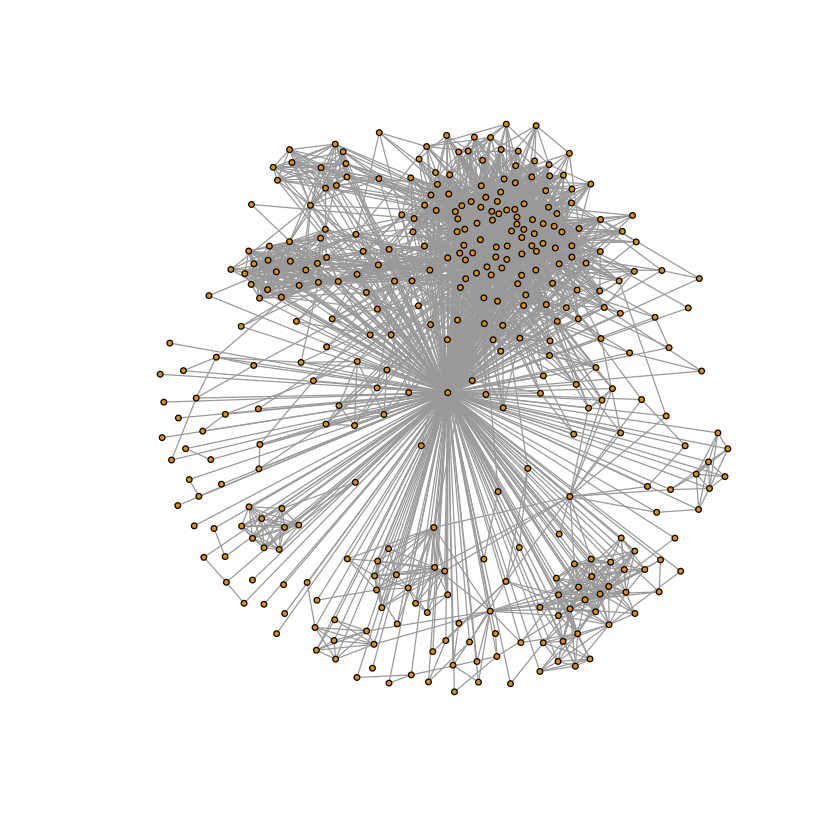

In [14]:
induced_graph=induced_subgraph(g,c(1,neighbors(g,1)))
plot(induced_graph,vertex.size=2,vertex.label=NA,directed=FALSE)

In [15]:
N_nodes=length(V(induced_graph))
cat("The number of nodes in the personalized network of ID 1 = ",N_nodes,'\n')
N_edges=length(E(induced_graph))
cat("The number of edges in the personalized network of ID 1 = ",N_edges)

The number of nodes in the personalized network of ID 1 =  348 
The number of edges in the personalized network of ID 1 =  2866

- Question 6: What is the diameter of the personalized network? Please
state a trivial upper and lower bound for the diameter of the personalized
network.

In [16]:
Diameter_1=diameter(induced_graph)
cat("The diameter of the personalized network of ID 1 = ",Diameter_1)

The diameter of the personalized network of ID 1 =  2

- Question 6: What is the diameter of the personalized network? Please
state a trivial upper and lower bound for the diameter of the personalized
network.

In [17]:
cat("Trivial lower bound = ",1,'\n')
cat("Trivial upper bound = ",2)

Trivial lower bound =  1 
Trivial upper bound =  2

- Question 7: In the context of the personalized network, what is the
meaning of the diameter of the personalized network to be equal to the
upper bound you derived in question 6. What is the meaning of the diameter
of the personalized network to be equal to the lower bound you
derived in question 6?

In [82]:
cat("When the number of personalized neighbor is 1, the lower bound is met; When the neighbor of
the personalized network is greater than 1, the upper bound is met.")

When the number of personalized neighbor is 1, the lower bound is met; When the neighbor of
the personalized network is greater than 1, the upper bound is met.